In [1]:
# Some essential libraries
import numpy as np
import pandas as pd
import datetime

# For initial "ugly" plot
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import textwrap

# For Bokeh
from collections import OrderedDict

from bokeh.plotting import *
from bokeh.models import DatetimeTickFormatter
from bokeh.models import HoverTool
from bokeh.transform import factor_cmap, factor_mark

In [2]:
# Get the timelines
timeline = pd.read_csv('cv19_timeline_utf8.csv').fillna('')
timeline.Date = pd.to_datetime(timeline.Date, format='%d-%b-%y').dt.date

timeline_uk = pd.read_csv('uk_cv19_timeline_utf8.csv').fillna('')
timeline_uk.Date = pd.to_datetime(timeline_uk.Date, format='%d-%b-%y').dt.date

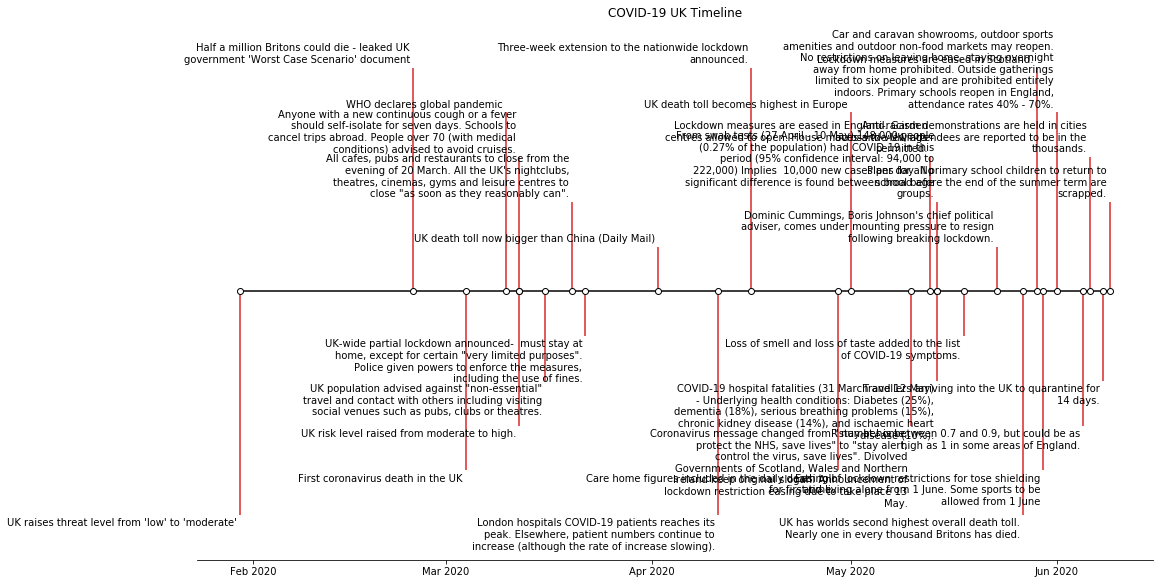

In [3]:
string_linebreak = 50
# Choose some nice levels
levels = np.tile([-5, 5,-4, 4, -3, 3, -2, 2,  -1, 1],
                 int(np.ceil(len(timeline_uk['Date'])/6)))[:len(timeline_uk['Date'])]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(16, 8), constrained_layout=True)
ax.set(title="COVID-19 UK Timeline")

ax.vlines(timeline_uk['Date'], 0, levels, color="tab:red")  # The vertical stems.
ax.plot(timeline_uk['Date'], np.zeros_like(timeline_uk['Date']), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(timeline_uk['Date'], levels, timeline_uk['Headline']):
    ax.annotate("\n".join(textwrap.wrap(r, string_linebreak)), xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
#ax.set_xlabel('Date')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
#plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()

In [4]:
output_notebook()

colors= ['darkgrey', 'tomato', 'darkgrey']
transport = [False, True, False]

source = ColumnDataSource(
    data=dict(
        date=timeline_uk.Date,
        date_tooltip = [x.strftime("%d-%m-%Y") for x in timeline_uk.Date],
        y=np.zeros(len(timeline_uk)),
        headline=timeline_uk.Headline,
        colors=timeline_uk.Transport.apply(lambda c: colors[c]),
        transport=timeline_uk.Transport.apply(lambda c: transport[c])
    )
)

TOOLS='pan,wheel_zoom,box_zoom,reset'
p = figure(title='Timeline UK', tools=TOOLS, width=1100,height=300)

p.add_tools(HoverTool(
    tooltips=[
        ( 'Date',      '@date_tooltip'),
        ( 'Headline',  '@headline'    ),
        ( 'Transport Analysis',    '@transport'),
    ],
    
    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
))

p.circle('date', 'y', size=10, source=source, color='colors')

p.xaxis.formatter=DatetimeTickFormatter(
        hours=["%d %B %Y"],
        days=["%d %B %Y"],
        months=["%d %B %Y"],
        years=["%d %B %Y"],
    )

p.yaxis.visible = False
show(p)

Loading BokehJS ...

In [5]:
from timeline import TimelineData
timeline = TimelineData('uk_cv19_timeline_utf8.csv')

In [6]:
timeline.plot_timeline()

Loading BokehJS ...

In [7]:
timeline.plot_timeline(colors= ['darkgrey', 'tomato', 'gold'], transport = [False, True, True])

Loading BokehJS ...